In [7]:
!pip install mlxtend

In [95]:
pip install jupyter_contrib_nbextensions

  Created wheel for jupyter-latex-envs: filename=jupyter_latex_envs-1.4.6-py2.py3-none-any.whl size=963399 sha256=885e395341fe0f4c71b277c9f39836045a92c2d107476db116925c0b6039fbf0
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\4d\ba\f4\b8c0941055519ebc0f27e85bfe2bb223f1a59a3b8bfc5c7515
  Created wheel for jupyter-nbextensions-configurator: filename=jupyter_nbextensions_configurator-0.4.1-py2.py3-none-any.whl size=465829 sha256=1c0fc7cf5260adb8e379b5bcfbd81853a9e268db50e487b1af6ea62516985cef
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\e3\3a\b3\a709b437602c3807f079f0c35ccba3e1adf9af6f2e6b0ebfea
Successfully built jupyter-latex-envs jupyter-nbextensions-configurator
Note: you may need to restart the kernel to use updated packages.


In [8]:
!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in c:\users\dell\anaconda3\lib\site-packages (2.9.0)


In [125]:
import pandas as pd
import numpy as np
import pandas_profiling
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import utils
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from mlxtend.classifier import StackingClassifier, StackingCVClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import plot_roc_curve, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVC
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")


In [11]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [12]:
X = train["Annual_Premium"]
y = train["Vintage"]

In [13]:
A = train[train["Annual_Premium"]> 500000]

In [14]:
A

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
11319,11320,Female,50,1,46.0,1,1-2 Year,No,508073.0,26.0,192,0
54743,54744,Male,26,1,28.0,0,< 1 Year,Yes,540165.0,156.0,245,1
144282,144283,Female,53,1,28.0,1,1-2 Year,No,540165.0,26.0,134,0
190154,190155,Male,47,1,28.0,0,1-2 Year,Yes,540165.0,42.0,24,0
268332,268333,Male,46,1,28.0,0,1-2 Year,Yes,540165.0,124.0,59,0


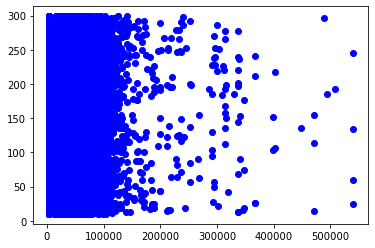

In [15]:
plt.scatter(X,y,color = "blue",marker = "o")
plt.show()

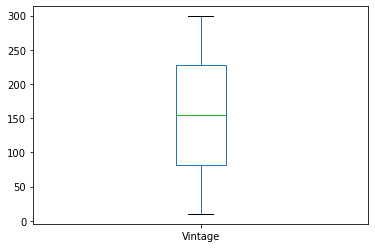

In [16]:
y.plot(kind = "box")

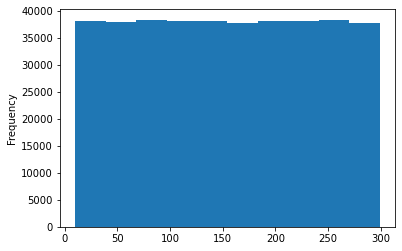

In [17]:
y.plot(kind = "hist")

In [18]:
train.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [19]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [20]:
test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [21]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [22]:
train.groupby("Gender").mean()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Gender,,,,,,,,,
Female,190435.719352,36.372746,0.998789,26.380134,0.502508,30495.787990,118.572495,154.575917,0.103902
Male,190656.298463,40.903095,0.997089,26.396173,0.420590,30622.649122,106.481763,154.153327,0.138411


In [23]:
train.groupby("Gender").median()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Gender,,,,,,,,,
Female,190278.5,30.0,1.0,28.0,1.0,31322.0,152.0,155.0,0.0
Male,190778.0,41.0,1.0,28.0,0.0,31986.0,124.0,154.0,0.0


In [24]:
train.groupby(["Vehicle_Damage","Gender"]).mean()

id        Age  Driving_License  Region_Code  \
Vehicle_Damage Gender                                                           
No             Female  190742.985245  32.552441         0.999308    25.972146   
               Male    190701.519686  36.756484         0.997964    26.051906   
Yes            Female  190067.937526  40.945459         0.998167    26.868474   
               Male    190618.861044  44.335962         0.996364    26.681183   

                       Previously_Insured  Annual_Premium  \
Vehicle_Damage Gender                                       
No             Female            0.880352    30318.357485   
               Male              0.865215    30487.208086   
Yes            Female            0.050248    30708.163384   
               Male              0.052498    30734.777069   

                       Policy_Sales_Channel     Vintage  Response  
Vehicle_Damage Gender                                              
No             Female            130.227550  154.731991  0.004384  
               Male              118.276095  154.307110  0.006042  
Yes            Female            104.621980  154.389104  0.223021  
               Male               96.717556  154.026014  0.247996

In [25]:
train.groupby(["Vehicle_Damage", "Gender"]).median()

id  Age  Driving_License  Region_Code  \
Vehicle_Damage Gender                                              
No             Female  190661   26                1         28.0   
               Male    191269   29                1         28.0   
Yes            Female  189798   40                1         28.0   
               Male    190438   44                1         28.0   

                       Previously_Insured  Annual_Premium  \
Vehicle_Damage Gender                                       
No             Female                   1         30675.0   
               Male                     1         31322.0   
Yes            Female                   0         32260.0   
               Male                     0         32604.5   

                       Policy_Sales_Channel  Vintage  Response  
Vehicle_Damage Gender                                           
No             Female                 152.0      155         0  
               Male                   152.0      154         0  
Yes            Female                 124.0      155         0  
               Male                   124.0      153         0

Text(0, 0.5, 'Number of Customers')

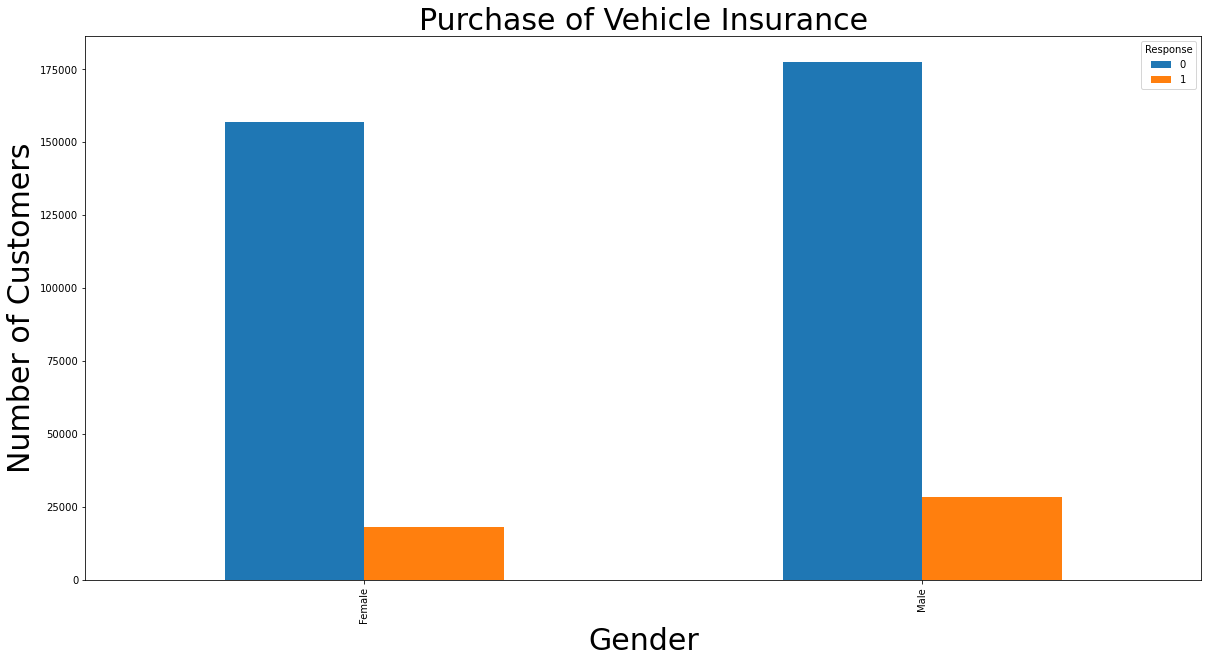

In [26]:
pd.crosstab(train["Gender"], train["Response"]).plot(kind = "bar", figsize = (20,10))
plt.title("Purchase of Vehicle Insurance", fontsize =30)
plt.xlabel("Gender", fontsize = 30)
plt.ylabel("Number of Customers", fontsize = 30)

In [27]:
#Variance Inflation Factor for train Data
X1 = train.select_dtypes(include = np.number)

vif_data = pd.DataFrame()
vif_data["Feature"] = X1.columns

vif_data["VIF"] = [variance_inflation_factor(X1.values,i)
                          for i in range(len(X1.columns))]

print(vif_data)

                Feature        VIF
0                    id   3.976955
1                   Age  10.458277
2       Driving_License  38.419729
3           Region_Code   4.954219
4    Previously_Insured   2.212152
5        Annual_Premium   4.176600
6  Policy_Sales_Channel   7.779482
7               Vintage   4.373306
8              Response   1.296666


In [28]:
X1.columns

Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [29]:
train.corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


In [30]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [31]:
#Variance Inflation Factor for train Test Data
y1 = test.select_dtypes(include = np.number)
vif_data = pd.DataFrame()
vif_data["Feature"] = y1.columns
names = list(vif_data["Feature"])
inp_df = pd.DataFrame(y1, columns = names)
for i in range(0,len(names)):
    y = inp_df.loc[:,inp_df.columns == names[i]]
    x = inp_df.loc[:,inp_df.columns != names[i]]
    model = sm.OLS(y,x)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1/ (1-rsq),2)
    print(
         "R Square value of {} column is {} keeping all other columns as features".format(
            names[i],(round(rsq,2))
         ))
    print(
        "Variance Inflation Factor of {} column is {} \n".format(
                names[i],vif)
    )


R Square value of id column is 0.99 keeping all other columns as features
Variance Inflation Factor of id column is 118.01 

R Square value of Age column is 0.91 keeping all other columns as features
Variance Inflation Factor of Age column is 10.62 

R Square value of Driving_License column is 0.99 keeping all other columns as features
Variance Inflation Factor of Driving_License column is 135.96 

R Square value of Region_Code column is 0.8 keeping all other columns as features
Variance Inflation Factor of Region_Code column is 5.0 

R Square value of Previously_Insured column is 0.5 keeping all other columns as features
Variance Inflation Factor of Previously_Insured column is 2.0 

R Square value of Annual_Premium column is 0.77 keeping all other columns as features
Variance Inflation Factor of Annual_Premium column is 4.28 

R Square value of Policy_Sales_Channel column is 0.87 keeping all other columns as features
Variance Inflation Factor of Policy_Sales_Channel column is 7.75 



In [32]:
train["source"] = "train"
test["source"] = "test"

In [33]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,source
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,train
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,train
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,train
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,train
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,train
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,train
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,train
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,train


In [34]:
test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,source
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53,test
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111,test
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199,test
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187,test
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297,test
...,...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56,test
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165,test
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74,test
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265,test


In [35]:
df = pd.concat([train,test])

In [36]:
df.isna().sum()

id                           0
Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
source                       0
dtype: int64

In [37]:
df_number_columns = df.select_dtypes(include = np.number).columns

In [38]:
df_number_columns

Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [39]:
df_category_columns = df.select_dtypes(exclude = np.number).columns

In [40]:
df_category_columns

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'source'], dtype='object')

In [41]:
data_to_encode = df[df_category_columns].drop(columns = "source")

In [42]:
data_to_encode

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No
...,...,...,...
127032,Female,< 1 Year,No
127033,Female,1-2 Year,Yes
127034,Male,< 1 Year,No
127035,Male,1-2 Year,No


In [43]:
df_category_encoded = pd.get_dummies(data_to_encode)

In [44]:
df_category_encoded

,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,0,1,0,0,1,0,1
1,0,1,1,0,0,1,0
2,0,1,0,0,1,0,1
3,0,1,0,1,0,1,0
4,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...
127032,1,0,0,1,0,1,0
127033,1,0,1,0,0,0,1
127034,0,1,0,1,0,1,0
127035,0,1,1,0,0,1,0


In [45]:
df_final = pd.concat([df_category_encoded,df[df_number_columns],df[["source"]]],axis = 1)

In [46]:
df_final

,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,source
0,0,1,0,0,1,0,1,1,44,1,28.0,0,40454.0,26.0,217,1.0,train
1,0,1,1,0,0,1,0,2,76,1,3.0,0,33536.0,26.0,183,0.0,train
2,0,1,0,0,1,0,1,3,47,1,28.0,0,38294.0,26.0,27,1.0,train
3,0,1,0,1,0,1,0,4,21,1,11.0,1,28619.0,152.0,203,0.0,train
4,1,0,0,1,0,1,0,5,29,1,41.0,1,27496.0,152.0,39,0.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127032,1,0,0,1,0,1,0,508142,26,1,37.0,1,30867.0,152.0,56,NaN,test
127033,1,0,1,0,0,0,1,508143,38,1,28.0,0,28700.0,122.0,165,NaN,test
127034,0,1,0,1,0,1,0,508144,21,1,46.0,1,29802.0,152.0,74,NaN,test
127035,0,1,1,0,0,1,0,508145,71,1,28.0,1,62875.0,26.0,265,NaN,test


In [47]:
train_preprocessed = df_final[df_final["source"]== "train"]

In [48]:
train_preprocessed

,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,source
0,0,1,0,0,1,0,1,1,44,1,28.0,0,40454.0,26.0,217,1.0,train
1,0,1,1,0,0,1,0,2,76,1,3.0,0,33536.0,26.0,183,0.0,train
2,0,1,0,0,1,0,1,3,47,1,28.0,0,38294.0,26.0,27,1.0,train
3,0,1,0,1,0,1,0,4,21,1,11.0,1,28619.0,152.0,203,0.0,train
4,1,0,0,1,0,1,0,5,29,1,41.0,1,27496.0,152.0,39,0.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,0,1,1,0,0,1,0,381105,74,1,26.0,1,30170.0,26.0,88,0.0,train
381105,0,1,0,1,0,1,0,381106,30,1,37.0,1,40016.0,152.0,131,0.0,train
381106,0,1,0,1,0,1,0,381107,21,1,30.0,1,35118.0,160.0,161,0.0,train
381107,1,0,0,0,1,0,1,381108,68,1,14.0,0,44617.0,124.0,74,0.0,train


In [49]:
test_preprocessed = df_final[df_final["source"]== "test"]

In [50]:
test_preprocessed

,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,source
0,0,1,0,1,0,1,0,381110,25,1,11.0,1,35786.0,152.0,53,NaN,test
1,0,1,1,0,0,0,1,381111,40,1,28.0,0,33762.0,7.0,111,NaN,test
2,0,1,1,0,0,0,1,381112,47,1,28.0,0,40050.0,124.0,199,NaN,test
3,0,1,0,1,0,0,1,381113,24,1,27.0,1,37356.0,152.0,187,NaN,test
4,0,1,0,1,0,1,0,381114,27,1,28.0,1,59097.0,152.0,297,NaN,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127032,1,0,0,1,0,1,0,508142,26,1,37.0,1,30867.0,152.0,56,NaN,test
127033,1,0,1,0,0,0,1,508143,38,1,28.0,0,28700.0,122.0,165,NaN,test
127034,0,1,0,1,0,1,0,508144,21,1,46.0,1,29802.0,152.0,74,NaN,test
127035,0,1,1,0,0,1,0,508145,71,1,28.0,1,62875.0,26.0,265,NaN,test


In [51]:
del train_preprocessed["source"]
train_preprocessed

,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,0,0,1,0,1,1,44,1,28.0,0,40454.0,26.0,217,1.0
1,0,1,1,0,0,1,0,2,76,1,3.0,0,33536.0,26.0,183,0.0
2,0,1,0,0,1,0,1,3,47,1,28.0,0,38294.0,26.0,27,1.0
3,0,1,0,1,0,1,0,4,21,1,11.0,1,28619.0,152.0,203,0.0
4,1,0,0,1,0,1,0,5,29,1,41.0,1,27496.0,152.0,39,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,0,1,1,0,0,1,0,381105,74,1,26.0,1,30170.0,26.0,88,0.0
381105,0,1,0,1,0,1,0,381106,30,1,37.0,1,40016.0,152.0,131,0.0
381106,0,1,0,1,0,1,0,381107,21,1,30.0,1,35118.0,160.0,161,0.0
381107,1,0,0,0,1,0,1,381108,68,1,14.0,0,44617.0,124.0,74,0.0


In [52]:
del test_preprocessed["source"]
test_preprocessed

,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,0,1,0,1,0,381110,25,1,11.0,1,35786.0,152.0,53,NaN
1,0,1,1,0,0,0,1,381111,40,1,28.0,0,33762.0,7.0,111,NaN
2,0,1,1,0,0,0,1,381112,47,1,28.0,0,40050.0,124.0,199,NaN
3,0,1,0,1,0,0,1,381113,24,1,27.0,1,37356.0,152.0,187,NaN
4,0,1,0,1,0,1,0,381114,27,1,28.0,1,59097.0,152.0,297,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127032,1,0,0,1,0,1,0,508142,26,1,37.0,1,30867.0,152.0,56,NaN
127033,1,0,1,0,0,0,1,508143,38,1,28.0,0,28700.0,122.0,165,NaN
127034,0,1,0,1,0,1,0,508144,21,1,46.0,1,29802.0,152.0,74,NaN
127035,0,1,1,0,0,1,0,508145,71,1,28.0,1,62875.0,26.0,265,NaN


In [53]:
train_preprocessed.to_csv("train_cross_sell_insurance_sales_preprocessed.csv", index = False)
test_preprocessed.to_csv("test_cross_sell_insurance_sales_preprocessed.csv", index = False)

In [54]:
train = pd.read_csv("train_cross_sell_insurance_sales_preprocessed.csv")
test = pd.read_csv("test_cross_sell_insurance_sales_preprocessed.csv")

In [55]:
train.head() 

,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,0,0,1,0,1,1,44,1,28.0,0,40454.0,26.0,217,1.0
1,0,1,1,0,0,1,0,2,76,1,3.0,0,33536.0,26.0,183,0.0
2,0,1,0,0,1,0,1,3,47,1,28.0,0,38294.0,26.0,27,1.0
3,0,1,0,1,0,1,0,4,21,1,11.0,1,28619.0,152.0,203,0.0
4,1,0,0,1,0,1,0,5,29,1,41.0,1,27496.0,152.0,39,0.0


In [57]:
train_X = train.drop(columns = "Response")

In [58]:
test.head() 

,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,0,1,0,1,0,381110,25,1,11.0,1,35786.0,152.0,53,NaN
1,0,1,1,0,0,0,1,381111,40,1,28.0,0,33762.0,7.0,111,NaN
2,0,1,1,0,0,0,1,381112,47,1,28.0,0,40050.0,124.0,199,NaN
3,0,1,0,1,0,0,1,381113,24,1,27.0,1,37356.0,152.0,187,NaN
4,0,1,0,1,0,1,0,381114,27,1,28.0,1,59097.0,152.0,297,NaN


In [59]:
test_X = test.drop(columns = "Response")

In [60]:
train_y = train["Response"]

In [61]:
len(test_X.columns)

15

In [62]:
len(train_X.columns)

15

In [63]:
sample = pd.read_csv("sample_submission.csv")
def run_insurance_sales_model(model,train_X, train_y, test_X, sample, filename):
    model.fit(train_X, train_y)
    pd.Series(model.coef_,index=test_X.columns).plot(kind = "bar")
    pred_train = model.predict(train_X)
    pred_test = model.predict(test_X)
    pred_test = abs(pred_test)
    print("RMSE of Train Data = ", np.sqrt(mean_squared_error(train_y, pred_train)))
    score = cross_val_score(model, train_X, train_y, cv = 10, scoring = "neg_root_mean_squared_error")
    print("cross validation score =", np.mean(np.abs(score)))
    sample["Response"] = pred_test.astype('int')
    sample.to_csv(filename, index = False)

RMSE of Train Data =  0.3027722141263094
cross validation score = 0.3027818244388842


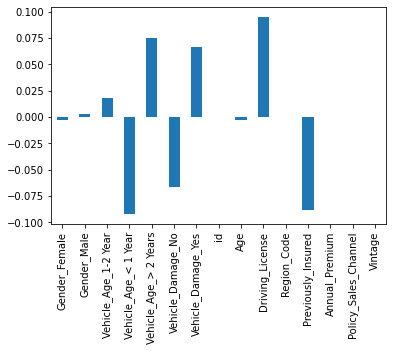

In [211]:
model = LinearRegression()
run_insurance_sales_model(model,train_X,train_y,test_X,sample, "insurance_sales_test_result_Linear_Regression.csv")

RMSE of Train Data =  0.3027722568101407
cross validation score = 0.302781865687416


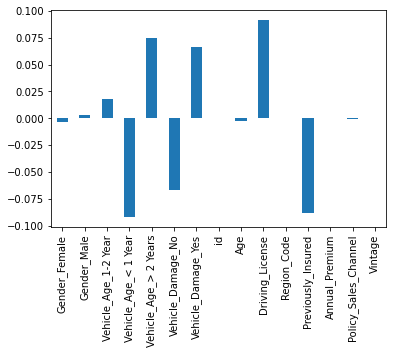

In [212]:
model = Ridge(alpha = 30)
run_insurance_sales_model(model,train_X,train_y,test_X,sample, "insurance_sales_test_result_Ridge_Regression_30.csv")

RMSE of Train Data =  0.3278535360282762
cross validation score = 0.32784962335594936


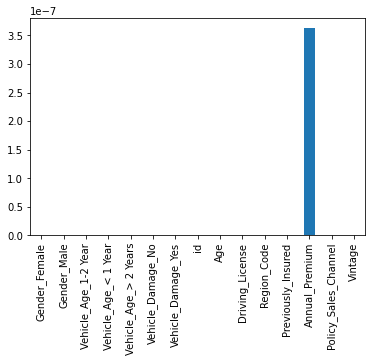

In [213]:
model = Lasso(alpha = 20)
run_insurance_sales_model(model,train_X,train_y,test_X,sample, "insurance_sales_test_result_Lasso_Regression.csv")

RMSE of Train Data =  0.3278561750754133
cross validation score = 0.3278519315972517


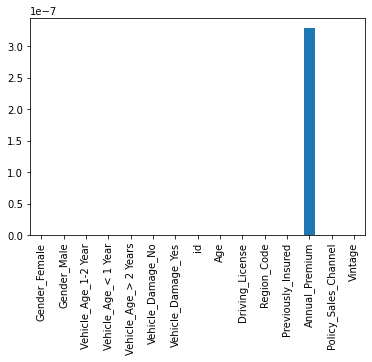

In [214]:
model = Lasso(alpha = 30)
run_insurance_sales_model(model,train_X,train_y,test_X,sample, "insurance_sales_test_result_Lasso_Regression_30.csv")

RMSE of Train Data =  0.32487437697888377
cross validation score = 0.3248733363265849


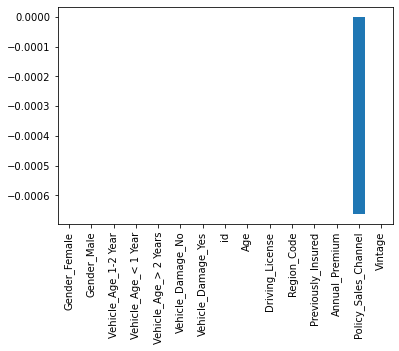

In [215]:
model = ElasticNet(alpha = 1,l1_ratio = 0.5)
run_insurance_sales_model(model,train_X,train_y,test_X,sample,"insurance_sales_test_result_ElasticNet_Regression.csv")

RMSE of Train Data =  0.32477480952958276
cross validation score = 0.3247738982917847


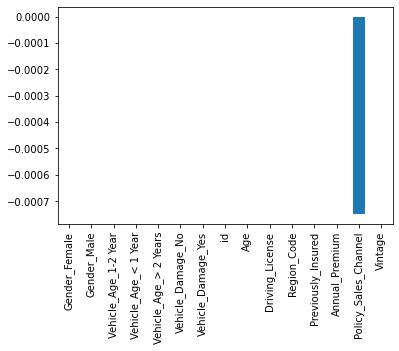

In [216]:
model = ElasticNet(alpha = 0.5,l1_ratio = 0.5)
run_insurance_sales_model(model,train_X,train_y,test_X,sample,"insurance_sales_test_result_ElasticNet_Regression_0_5.csv")

RMSE of Train Data =  0.3027722141263094
cross validation score = 0.3027818244388842


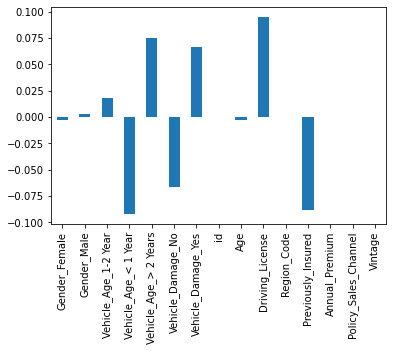

In [217]:
model = LinearRegression()
run_insurance_sales_model(model,train_X,train_y,test_X,sample, "insurance_sales_test_result_Linear_Regression_int.csv")

RMSE of Train Data =  0.30277223353350247
cross validation score = 0.3027818408278554


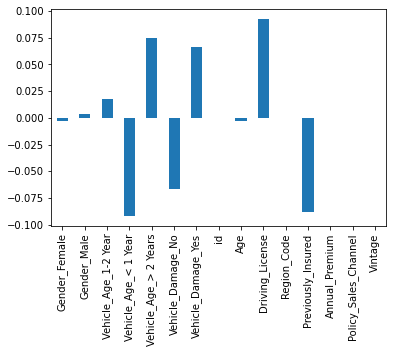

In [218]:
model = Ridge(alpha = 20)
run_insurance_sales_model(model,train_X,train_y,test_X,sample, "insurance_sales_test_result_Ridge_Regression_20_int.csv")

RMSE of Train Data =  0.3027722568101407
cross validation score = 0.302781865687416


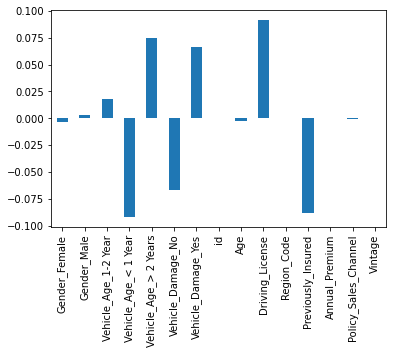

In [219]:
model = Ridge(alpha = 30)
run_insurance_sales_model(model,train_X,train_y,test_X,sample, "insurance_sales_test_result_Ridge_Regression_30_int.csv")

RMSE of Train Data =  0.3278535360282762
cross validation score = 0.32784962335594936


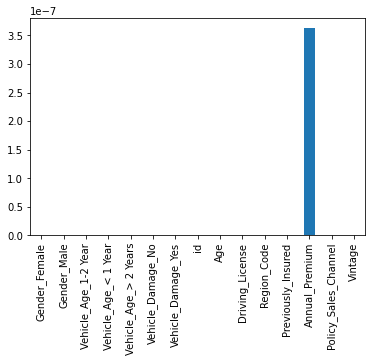

In [220]:
model = Lasso(alpha = 20)
run_insurance_sales_model(model,train_X,train_y,test_X,sample, "insurance_sales_test_result_Lasso_Regression_20_int.csv")

RMSE of Train Data =  0.3278561750754133
cross validation score = 0.3278519315972517


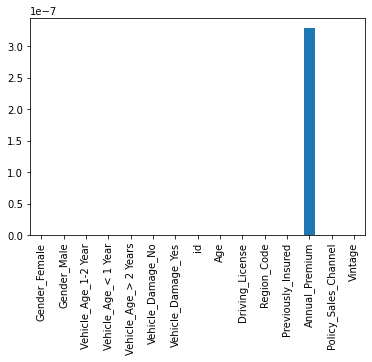

In [221]:
model = Lasso(alpha = 30)
run_insurance_sales_model(model,train_X,train_y,test_X,sample, "insurance_sales_test_result_Lasso_Regression_30_int.csv")

RMSE of Train Data =  0.32487437697888377
cross validation score = 0.3248733363265849


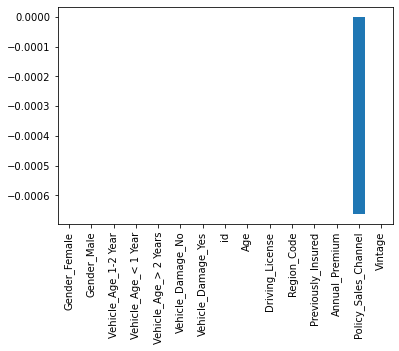

In [222]:
model = ElasticNet(alpha = 1,l1_ratio = 0.5)
run_insurance_sales_model(model,train_X,train_y,test_X,sample,"insurance_sales_test_result_ElasticNet_Regression_1_int.csv")

RMSE of Train Data =  0.32477480952958276
cross validation score = 0.3247738982917847


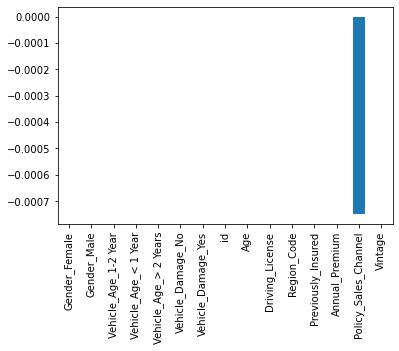

In [223]:
model = ElasticNet(alpha = 0.5,l1_ratio = 0.5)
run_insurance_sales_model(model,train_X,train_y,test_X,sample,"insurance_sales_test_result_ElasticNet_Regression_0_5_int.csv")

In [64]:
df_final

,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,source
0,0,1,0,0,1,0,1,1,44,1,28.0,0,40454.0,26.0,217,1.0,train
1,0,1,1,0,0,1,0,2,76,1,3.0,0,33536.0,26.0,183,0.0,train
2,0,1,0,0,1,0,1,3,47,1,28.0,0,38294.0,26.0,27,1.0,train
3,0,1,0,1,0,1,0,4,21,1,11.0,1,28619.0,152.0,203,0.0,train
4,1,0,0,1,0,1,0,5,29,1,41.0,1,27496.0,152.0,39,0.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127032,1,0,0,1,0,1,0,508142,26,1,37.0,1,30867.0,152.0,56,NaN,test
127033,1,0,1,0,0,0,1,508143,38,1,28.0,0,28700.0,122.0,165,NaN,test
127034,0,1,0,1,0,1,0,508144,21,1,46.0,1,29802.0,152.0,74,NaN,test
127035,0,1,1,0,0,1,0,508145,71,1,28.0,1,62875.0,26.0,265,NaN,test


In [65]:
data = df_final

In [66]:
data.isna().sum()

Gender_Female                 0
Gender_Male                   0
Vehicle_Age_1-2 Year          0
Vehicle_Age_< 1 Year          0
Vehicle_Age_> 2 Years         0
Vehicle_Damage_No             0
Vehicle_Damage_Yes            0
id                            0
Age                           0
Driving_License               0
Region_Code                   0
Previously_Insured            0
Annual_Premium                0
Policy_Sales_Channel          0
Vintage                       0
Response                 127037
source                        0
dtype: int64

In [67]:
data_train = data[data["source"] == "train"]

In [68]:
data_train

,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,source
0,0,1,0,0,1,0,1,1,44,1,28.0,0,40454.0,26.0,217,1.0,train
1,0,1,1,0,0,1,0,2,76,1,3.0,0,33536.0,26.0,183,0.0,train
2,0,1,0,0,1,0,1,3,47,1,28.0,0,38294.0,26.0,27,1.0,train
3,0,1,0,1,0,1,0,4,21,1,11.0,1,28619.0,152.0,203,0.0,train
4,1,0,0,1,0,1,0,5,29,1,41.0,1,27496.0,152.0,39,0.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,0,1,1,0,0,1,0,381105,74,1,26.0,1,30170.0,26.0,88,0.0,train
381105,0,1,0,1,0,1,0,381106,30,1,37.0,1,40016.0,152.0,131,0.0,train
381106,0,1,0,1,0,1,0,381107,21,1,30.0,1,35118.0,160.0,161,0.0,train
381107,1,0,0,0,1,0,1,381108,68,1,14.0,0,44617.0,124.0,74,0.0,train


In [69]:
del data_train["source"]

In [70]:
data_train

,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,0,0,1,0,1,1,44,1,28.0,0,40454.0,26.0,217,1.0
1,0,1,1,0,0,1,0,2,76,1,3.0,0,33536.0,26.0,183,0.0
2,0,1,0,0,1,0,1,3,47,1,28.0,0,38294.0,26.0,27,1.0
3,0,1,0,1,0,1,0,4,21,1,11.0,1,28619.0,152.0,203,0.0
4,1,0,0,1,0,1,0,5,29,1,41.0,1,27496.0,152.0,39,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,0,1,1,0,0,1,0,381105,74,1,26.0,1,30170.0,26.0,88,0.0
381105,0,1,0,1,0,1,0,381106,30,1,37.0,1,40016.0,152.0,131,0.0
381106,0,1,0,1,0,1,0,381107,21,1,30.0,1,35118.0,160.0,161,0.0
381107,1,0,0,0,1,0,1,381108,68,1,14.0,0,44617.0,124.0,74,0.0


In [71]:
data_test = data[data["source"] == "test"]

In [72]:
data_test

,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,source
0,0,1,0,1,0,1,0,381110,25,1,11.0,1,35786.0,152.0,53,NaN,test
1,0,1,1,0,0,0,1,381111,40,1,28.0,0,33762.0,7.0,111,NaN,test
2,0,1,1,0,0,0,1,381112,47,1,28.0,0,40050.0,124.0,199,NaN,test
3,0,1,0,1,0,0,1,381113,24,1,27.0,1,37356.0,152.0,187,NaN,test
4,0,1,0,1,0,1,0,381114,27,1,28.0,1,59097.0,152.0,297,NaN,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127032,1,0,0,1,0,1,0,508142,26,1,37.0,1,30867.0,152.0,56,NaN,test
127033,1,0,1,0,0,0,1,508143,38,1,28.0,0,28700.0,122.0,165,NaN,test
127034,0,1,0,1,0,1,0,508144,21,1,46.0,1,29802.0,152.0,74,NaN,test
127035,0,1,1,0,0,1,0,508145,71,1,28.0,1,62875.0,26.0,265,NaN,test


In [73]:
del data_test["source"]
data_test

,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,0,1,0,1,0,381110,25,1,11.0,1,35786.0,152.0,53,NaN
1,0,1,1,0,0,0,1,381111,40,1,28.0,0,33762.0,7.0,111,NaN
2,0,1,1,0,0,0,1,381112,47,1,28.0,0,40050.0,124.0,199,NaN
3,0,1,0,1,0,0,1,381113,24,1,27.0,1,37356.0,152.0,187,NaN
4,0,1,0,1,0,1,0,381114,27,1,28.0,1,59097.0,152.0,297,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127032,1,0,0,1,0,1,0,508142,26,1,37.0,1,30867.0,152.0,56,NaN
127033,1,0,1,0,0,0,1,508143,38,1,28.0,0,28700.0,122.0,165,NaN
127034,0,1,0,1,0,1,0,508144,21,1,46.0,1,29802.0,152.0,74,NaN
127035,0,1,1,0,0,1,0,508145,71,1,28.0,1,62875.0,26.0,265,NaN


In [74]:
# Dropping "Driving_License" column because of high VIF as it's multicolinearity is high.
test_data_X = data_test.drop(columns = ["Response","Driving_License"])

In [75]:
test_data_X

,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,id,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,1,0,1,0,1,0,381110,25,11.0,1,35786.0,152.0,53
1,0,1,1,0,0,0,1,381111,40,28.0,0,33762.0,7.0,111
2,0,1,1,0,0,0,1,381112,47,28.0,0,40050.0,124.0,199
3,0,1,0,1,0,0,1,381113,24,27.0,1,37356.0,152.0,187
4,0,1,0,1,0,1,0,381114,27,28.0,1,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127032,1,0,0,1,0,1,0,508142,26,37.0,1,30867.0,152.0,56
127033,1,0,1,0,0,0,1,508143,38,28.0,0,28700.0,122.0,165
127034,0,1,0,1,0,1,0,508144,21,46.0,1,29802.0,152.0,74
127035,0,1,1,0,0,1,0,508145,71,28.0,1,62875.0,26.0,265


In [76]:
train_data_X = data_train.drop(columns = ["Response","Driving_License"])

In [77]:
train_data_X

,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,id,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,1,0,0,1,0,1,1,44,28.0,0,40454.0,26.0,217
1,0,1,1,0,0,1,0,2,76,3.0,0,33536.0,26.0,183
2,0,1,0,0,1,0,1,3,47,28.0,0,38294.0,26.0,27
3,0,1,0,1,0,1,0,4,21,11.0,1,28619.0,152.0,203
4,1,0,0,1,0,1,0,5,29,41.0,1,27496.0,152.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,0,1,1,0,0,1,0,381105,74,26.0,1,30170.0,26.0,88
381105,0,1,0,1,0,1,0,381106,30,37.0,1,40016.0,152.0,131
381106,0,1,0,1,0,1,0,381107,21,30.0,1,35118.0,160.0,161
381107,1,0,0,0,1,0,1,381108,68,14.0,0,44617.0,124.0,74


In [78]:
train_data_y = data_train["Response"]

In [79]:
train_data_y

0         1.0
1         0.0
2         1.0
3         0.0
4         0.0
         ... 
381104    0.0
381105    0.0
381106    0.0
381107    0.0
381108    0.0
Name: Response, Length: 381109, dtype: float64

In [80]:
# Train Test Split

train_X,test_X,train_y,test_y = train_test_split(train_data_X,train_data_y, test_size = 0.3, random_state = 30)

In [81]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((266776, 14), (114333, 14), (266776,), (114333,))

In [82]:
data_train["Response"].value_counts(normalize = True)

0.0    0.877437
1.0    0.122563
Name: Response, dtype: float64

In [83]:
train_y.value_counts(normalize = True)

0.0    0.877088
1.0    0.122912
Name: Response, dtype: float64

In [84]:
test_y.value_counts(normalize = True)

0.0    0.87825
1.0    0.12175
Name: Response, dtype: float64

In [85]:
test_y

183357    0.0
89444     0.0
270115    0.0
212411    1.0
193551    0.0
         ... 
209982    0.0
239501    0.0
99865     0.0
232842    0.0
182730    1.0
Name: Response, Length: 114333, dtype: float64

In [86]:
test_data_X.shape

(127037, 14)

In [87]:
test_data_X.to_csv("test_data_X.csv",index = False)

In [89]:
train_data_X.shape

(381109, 14)

In [248]:
test_X

,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,id,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
183357,0,1,1,0,0,1,0,183358,49,33.0,1,41667.0,124.0,53
89444,1,0,0,1,0,0,1,89445,22,5.0,0,40922.0,152.0,160
270115,1,0,1,0,0,0,1,270116,44,48.0,0,2630.0,124.0,247
212411,0,1,1,0,0,0,1,212412,46,28.0,0,50724.0,124.0,202
193551,0,1,1,0,0,1,0,193552,75,28.0,1,70833.0,124.0,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209982,0,1,1,0,0,0,1,209983,64,28.0,0,37865.0,124.0,246
239501,0,1,1,0,0,0,1,239502,65,17.0,1,38620.0,7.0,57
99865,0,1,0,0,1,0,1,99866,60,28.0,0,40843.0,26.0,73
232842,0,1,0,1,0,1,0,232843,25,41.0,1,32430.0,152.0,94


In [249]:
sample_1 = pd.read_csv("sample_submission.csv")

In [250]:
sample_1_y = sample_1["Response"]

In [251]:
sample_1_y.shape

(127037,)

In [252]:
sample_1_y

0         0
1         0
2         0
3         0
4         0
         ..
127032    0
127033    0
127034    0
127035    0
127036    0
Name: Response, Length: 127037, dtype: int64

In [90]:
def run_model_insurance_sales(model, train_X, train_y, test_data_X,sample_1,filename):
    model.fit(train_X, train_y)
    pred_train = model.predict(train_X)
    pred_test = model.predict(test_data_X)
    pred_test = abs(pred_test)
    print("RMSE of Train Data = ",np.sqrt(mean_squared_error(train_y, pred_train)))
    score = cross_val_score(model, train_X, train_y, cv = 10, scoring = "neg_root_mean_squared_error" )
    print("Cross validation Score  = ",np.mean(np.abs(score)))
    sample_1["Response"] = pred_test.astype('int')
    sample_1.to_csv(filename, index=False)

# Model Building

In [91]:
#sample_1 = pd.read_csv("sample_submission.csv")
def run_model_insurance_sales_validate(model, train_X, train_y, test_X,test_y):
    model.fit(train_X, train_y)
    pred_train = model.predict(train_X)
    pred_test = model.predict(test_X)
    print("Train Accuracy : ", accuracy_score(train_y, pred_train))
    print("Test Accuracy : ", accuracy_score(test_y, pred_test))
    
    print("Train F1 Score : ",f1_score(train_y,pred_train))
    print("Test F1 Score : ", f1_score(test_y, pred_test))
    
    print("Train Confusion Matrix : ",confusion_matrix(train_y,pred_train))
    print("Test Confusion Matrix : ", confusion_matrix(test_y, pred_test))
    
    print("Train Classification Report : ",classification_report(train_y,pred_train))
    print("Test Classification Report : ", classification_report(test_y, pred_test))
    
    return model, accuracy_score(test_y, pred_test), f1_score(test_y, pred_test)
    
    

In [93]:
model = LinearRegression()

In [94]:
cross_val_score(model,train_X,train_y,cv = 10)

array([0.14822687, 0.14447908, 0.1476365 , 0.14957223, 0.14586839,
       0.15105794, 0.1447724 , 0.14672871, 0.14954257, 0.14557451])

In [256]:
params = {'penalty':['l1','l2','elasticnet','none'],'C':np.logspace(-4,4,20),
          'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
          'max_iter':[100,110,115,120]} 

In [257]:
gs = GridSearchCV(model,params,cv=3,verbose = True,n_jobs =-1)

In [258]:
model = LogisticRegression()

In [107]:
gs.fit(train_X,train_y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 29.3min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 40.4min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 126.8min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 141.7min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed: 155.4min finished


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 110, 115, 120],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             verbose=True)

In [108]:
gs.best_estimator_

LogisticRegression(C=0.004832930238571752, max_iter=110, penalty='l1',
                   solver='liblinear')

In [96]:
model = LogisticRegression(max_iter = 110)
model_name, accuracy, f1_score = run_model_insurance_sales_validate(model, train_X, train_y, test_X, test_y)

Train Accuracy :  0.877087893963475
Test Accuracy :  0.8782503739077957
Train F1 Score :  0.0
Test F1 Score :  0.0
Train Confusion Matrix :  [[233986      0]
 [ 32790      0]]
Test Confusion Matrix :  [[100413      0]
 [ 13920      0]]


C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Classification Report :                precision    recall  f1-score   support

         0.0       0.88      1.00      0.93    233986
         1.0       0.00      0.00      0.00     32790

    accuracy                           0.88    266776
   macro avg       0.44      0.50      0.47    266776
weighted avg       0.77      0.88      0.82    266776

Test Classification Report :                precision    recall  f1-score   support

         0.0       0.88      1.00      0.94    100413
         1.0       0.00      0.00      0.00     13920

    accuracy                           0.88    114333
   macro avg       0.44      0.50      0.47    114333
weighted avg       0.77      0.88      0.82    114333



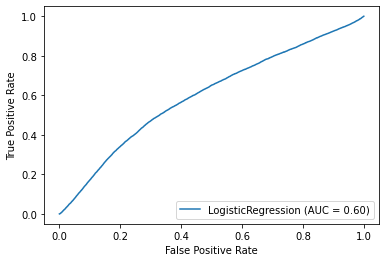

In [260]:
plot_roc_curve(model, test_X, test_y)

0         40454.0
1         33536.0
2         38294.0
3         28619.0
4         27496.0
           ...   
381104    30170.0
381105    40016.0
381106    35118.0
381107    44617.0
381108    41777.0
Name: Annual_Premium, Length: 381109, dtype: float64


In [261]:
model.predict_proba(test_X)[:,1]

array([0.1010772 , 0.10803472, 0.08806411, ..., 0.22606145, 0.08621816,
       0.09280539])

In [262]:
test_X

,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,id,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
183357,0,1,1,0,0,1,0,183358,49,33.0,1,41667.0,124.0,53
89444,1,0,0,1,0,0,1,89445,22,5.0,0,40922.0,152.0,160
270115,1,0,1,0,0,0,1,270116,44,48.0,0,2630.0,124.0,247
212411,0,1,1,0,0,0,1,212412,46,28.0,0,50724.0,124.0,202
193551,0,1,1,0,0,1,0,193552,75,28.0,1,70833.0,124.0,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209982,0,1,1,0,0,0,1,209983,64,28.0,0,37865.0,124.0,246
239501,0,1,1,0,0,0,1,239502,65,17.0,1,38620.0,7.0,57
99865,0,1,0,0,1,0,1,99866,60,28.0,0,40843.0,26.0,73
232842,0,1,0,1,0,1,0,232843,25,41.0,1,32430.0,152.0,94


In [263]:
model.predict_proba(test_X)[:,1]

array([0.1010772 , 0.10803472, 0.08806411, ..., 0.22606145, 0.08621816,
       0.09280539])

In [264]:
run_model_insurance_sales(model,train_X,train_y,test_data_X,sample_1,"Insurance_Sales_test_result_Logistic_Regression_int.csv")

RMSE of Train Data =  0.35058822860519007


C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross validation Score  =  0.3505882286495253


In [265]:
sample_1.shape

(127037, 2)

In [266]:
sample_1_y.shape

(127037,)

In [267]:
test_data_X.shape

(127037, 14)

In [268]:
train_X.shape

(266776, 14)

In [269]:
train_y.shape

(266776,)

In [270]:
train_y.shape

(266776,)

In [271]:
model = SVC()

In [272]:
model.fit(train_X,train_y)

SVC()

In [273]:
pca = PCA(n_components = 10)

In [277]:
model_name, accuracy, f1_score = run_model_insurance_sales_validate(model, train_X, train_y.astype('int'), test_X, test_y.astype('int'))

Train Accuracy :  0.877087893963475
Test Accuracy :  0.8782503739077957


TypeError: 'numpy.float64' object is not callable

In [278]:
pca.fit(train_X)

PCA(n_components=10)

In [279]:
transform_train = pca.fit_transform(train_X)

In [280]:
transform_train[1]

array([-1.76786755e+05,  4.43858029e+03,  1.13626431e+02,  1.29560326e+01,
        3.87114622e+00,  5.68076694e+00, -9.96430775e-01, -4.83243811e-01,
       -4.06646596e-01,  1.93470258e-03])

In [281]:
model = SVC()

In [282]:
model.fit(transform_train, train_y)

SVC()

In [284]:
train_pred = model.predict(transform_train)
accuracy_score(train_y, train_pred)

0.877087893963475

In [285]:
train_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [286]:
train_y

317832    0.0
367388    0.0
331888    0.0
19955     1.0
193857    0.0
         ... 
358197    0.0
328599    0.0
46220     0.0
360948    0.0
48045     1.0
Name: Response, Length: 266776, dtype: float64

In [287]:
np.array(train_pred).reshape(-1,1)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [288]:
run_model_insurance_sales(model,train_X,train_y,test_data_X,np.array(train_pred).reshape(-1,1),"Insurance_Sales_test_result_SVM_int.csv")

RMSE of Train Data =  0.35058822860519007


KeyboardInterrupt: 

In [289]:
model.fit(test_data_X, sample_1_y)

ValueError: The number of classes has to be greater than one; got 1 class

In [290]:
df_number_columns = train.select_dtypes(include = np.number).columns

In [291]:
df_number_columns

Index(['Gender_Female', 'Gender_Male', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Vehicle_Damage_No',
       'Vehicle_Damage_Yes', 'id', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel',
       'Vintage', 'Response'],
      dtype='object')

In [292]:
train[df_number_columns]

,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,0,0,1,0,1,1,44,1,28.0,0,40454.0,26.0,217,1.0
1,0,1,1,0,0,1,0,2,76,1,3.0,0,33536.0,26.0,183,0.0
2,0,1,0,0,1,0,1,3,47,1,28.0,0,38294.0,26.0,27,1.0
3,0,1,0,1,0,1,0,4,21,1,11.0,1,28619.0,152.0,203,0.0
4,1,0,0,1,0,1,0,5,29,1,41.0,1,27496.0,152.0,39,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,0,1,1,0,0,1,0,381105,74,1,26.0,1,30170.0,26.0,88,0.0
381105,0,1,0,1,0,1,0,381106,30,1,37.0,1,40016.0,152.0,131,0.0
381106,0,1,0,1,0,1,0,381107,21,1,30.0,1,35118.0,160.0,161,0.0
381107,1,0,0,0,1,0,1,381108,68,1,14.0,0,44617.0,124.0,74,0.0


In [293]:
df_category_columns = test.select_dtypes(exclude = np.number).columns

In [294]:
test

,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,0,1,0,1,0,381110,25,1,11.0,1,35786.0,152.0,53,NaN
1,0,1,1,0,0,0,1,381111,40,1,28.0,0,33762.0,7.0,111,NaN
2,0,1,1,0,0,0,1,381112,47,1,28.0,0,40050.0,124.0,199,NaN
3,0,1,0,1,0,0,1,381113,24,1,27.0,1,37356.0,152.0,187,NaN
4,0,1,0,1,0,1,0,381114,27,1,28.0,1,59097.0,152.0,297,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127032,1,0,0,1,0,1,0,508142,26,1,37.0,1,30867.0,152.0,56,NaN
127033,1,0,1,0,0,0,1,508143,38,1,28.0,0,28700.0,122.0,165,NaN
127034,0,1,0,1,0,1,0,508144,21,1,46.0,1,29802.0,152.0,74,NaN
127035,0,1,1,0,0,1,0,508145,71,1,28.0,1,62875.0,26.0,265,NaN


In [295]:
df_category_columns

Index([], dtype='object')

In [296]:
data_to_encode = train[df_category_columns]

In [297]:
data_to_encode

""
0
1
2
3
4
...
381104
381105
381106
381107


In [121]:
category_encoded = pd.get_dummies(data_to_encode)

ValueError: No objects to concatenate

In [122]:
category_encoded

NameError: name 'category_encoded' is not defined

In [298]:
train_final = train[df_number_columns]

In [299]:
train_final

,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,0,0,1,0,1,1,44,1,28.0,0,40454.0,26.0,217,1.0
1,0,1,1,0,0,1,0,2,76,1,3.0,0,33536.0,26.0,183,0.0
2,0,1,0,0,1,0,1,3,47,1,28.0,0,38294.0,26.0,27,1.0
3,0,1,0,1,0,1,0,4,21,1,11.0,1,28619.0,152.0,203,0.0
4,1,0,0,1,0,1,0,5,29,1,41.0,1,27496.0,152.0,39,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,0,1,1,0,0,1,0,381105,74,1,26.0,1,30170.0,26.0,88,0.0
381105,0,1,0,1,0,1,0,381106,30,1,37.0,1,40016.0,152.0,131,0.0
381106,0,1,0,1,0,1,0,381107,21,1,30.0,1,35118.0,160.0,161,0.0
381107,1,0,0,0,1,0,1,381108,68,1,14.0,0,44617.0,124.0,74,0.0


In [300]:
df_number_test_columns = test.select_dtypes(include = np.number).columns
df_number_test_columns

Index(['Gender_Female', 'Gender_Male', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Vehicle_Damage_No',
       'Vehicle_Damage_Yes', 'id', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel',
       'Vintage', 'Response'],
      dtype='object')

In [304]:
df_category_test_columns = test.select_dtypes(exclude = np.number).columns
df_category_test_columns

Index([], dtype='object')

In [305]:
data_to_encode_test = test[df_category_test_columns]

In [303]:
data_to_encode_test

""
0
1
2
3
4
...
127032
127033
127034
127035


In [ ]:
category_encoded_test = pd.get_dummies()

In [306]:
X = train_final.drop(columns = "Response")
y = train_final["Response"]

In [307]:
X

,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,1,0,0,1,0,1,1,44,1,28.0,0,40454.0,26.0,217
1,0,1,1,0,0,1,0,2,76,1,3.0,0,33536.0,26.0,183
2,0,1,0,0,1,0,1,3,47,1,28.0,0,38294.0,26.0,27
3,0,1,0,1,0,1,0,4,21,1,11.0,1,28619.0,152.0,203
4,1,0,0,1,0,1,0,5,29,1,41.0,1,27496.0,152.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,0,1,1,0,0,1,0,381105,74,1,26.0,1,30170.0,26.0,88
381105,0,1,0,1,0,1,0,381106,30,1,37.0,1,40016.0,152.0,131
381106,0,1,0,1,0,1,0,381107,21,1,30.0,1,35118.0,160.0,161
381107,1,0,0,0,1,0,1,381108,68,1,14.0,0,44617.0,124.0,74


In [308]:
y

0         1.0
1         0.0
2         1.0
3         0.0
4         0.0
         ... 
381104    0.0
381105    0.0
381106    0.0
381107    0.0
381108    0.0
Name: Response, Length: 381109, dtype: float64

In [309]:
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size = 0.3,random_state = 24)

In [310]:
train_X

,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
177919,0,1,1,0,0,0,1,177920,47,1,28.0,0,32793.0,26.0,266
29864,1,0,0,1,0,1,0,29865,21,1,8.0,1,34020.0,160.0,170
209070,1,0,0,1,0,1,0,209071,26,1,46.0,1,47812.0,152.0,80
204074,1,0,0,1,0,1,0,204075,28,1,36.0,1,2630.0,152.0,85
272798,0,1,0,1,0,0,1,272799,22,1,18.0,0,34472.0,152.0,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307183,0,1,0,1,0,0,1,307184,23,1,41.0,1,39892.0,152.0,65
268644,0,1,0,1,0,1,0,268645,32,1,35.0,1,36651.0,152.0,101
211136,0,1,0,1,0,1,0,211137,22,1,21.0,1,38801.0,152.0,289
899,0,1,0,1,0,0,1,900,24,1,6.0,1,29526.0,152.0,32


In [133]:
test_X

,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
131042,0,1,1,0,0,0,1,131043,44,1,46.0,0,40201.0,124.0,151
196569,1,0,0,1,0,1,0,196570,24,1,8.0,1,26397.0,152.0,255
152130,1,0,0,1,0,1,0,152131,25,1,50.0,1,21928.0,152.0,34
36703,1,0,0,1,0,0,1,36704,23,1,47.0,1,42886.0,152.0,176
366815,1,0,0,0,1,0,1,366816,53,1,28.0,0,65412.0,26.0,186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291933,1,0,0,1,0,1,0,291934,22,1,3.0,1,39141.0,152.0,186
105781,0,1,0,1,0,1,0,105782,31,1,38.0,1,2630.0,152.0,187
76695,0,1,0,1,0,0,1,76696,53,1,30.0,0,36905.0,26.0,279
70616,1,0,0,1,0,1,0,70617,23,1,15.0,1,23077.0,152.0,51


In [134]:
test_y

131042    0.0
196569    0.0
152130    0.0
36703     0.0
366815    1.0
         ... 
291933    0.0
105781    0.0
76695     0.0
70616     0.0
43876     1.0
Name: Response, Length: 114333, dtype: float64

In [135]:
train_y

177919    1.0
29864     0.0
209070    0.0
204074    0.0
272798    0.0
         ... 
307183    0.0
268644    0.0
211136    0.0
899       0.0
242082    0.0
Name: Response, Length: 266776, dtype: float64

In [97]:
stnd_X = StandardScaler()
#train_X = SC.fit_transform(train_X)
#train_X
#train_X = SC.transform(train_X)
#Scaled_test = StandardScaler(test_X1)

In [98]:
test_data_X = stnd_X.fit_transform(test_data_X)

In [99]:
train_X

,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,id,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
317832,1,0,0,1,0,1,0,317833,25,46.0,1,26847.0,152.0,281
367388,0,1,1,0,0,0,1,367389,43,29.0,0,35075.0,124.0,268
331888,1,0,0,1,0,1,0,331889,26,9.0,1,28632.0,152.0,72
19955,0,1,1,0,0,0,1,19956,48,28.0,0,2630.0,26.0,85
193857,1,0,0,1,0,1,0,193858,21,41.0,1,32619.0,160.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358197,1,0,0,1,0,1,0,358198,25,28.0,1,39206.0,152.0,274
328599,0,1,1,0,0,0,1,328600,55,19.0,0,28593.0,26.0,158
46220,0,1,1,0,0,1,0,46221,58,29.0,1,38208.0,124.0,60
360948,1,0,0,1,0,0,1,360949,21,26.0,0,24036.0,152.0,132


In [100]:
#train_final.drop(columns = "Response")
train_X

,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,id,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
317832,1,0,0,1,0,1,0,317833,25,46.0,1,26847.0,152.0,281
367388,0,1,1,0,0,0,1,367389,43,29.0,0,35075.0,124.0,268
331888,1,0,0,1,0,1,0,331889,26,9.0,1,28632.0,152.0,72
19955,0,1,1,0,0,0,1,19956,48,28.0,0,2630.0,26.0,85
193857,1,0,0,1,0,1,0,193858,21,41.0,1,32619.0,160.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358197,1,0,0,1,0,1,0,358198,25,28.0,1,39206.0,152.0,274
328599,0,1,1,0,0,0,1,328600,55,19.0,0,28593.0,26.0,158
46220,0,1,1,0,0,1,0,46221,58,29.0,1,38208.0,124.0,60
360948,1,0,0,1,0,0,1,360949,21,26.0,0,24036.0,152.0,132


In [101]:
test_data_X

array([[-0.92829407,  0.92829407, -1.05139088, ...,  0.31049188,
         0.73934864, -1.21105399],
       [-0.92829407,  0.92829407,  0.95112105, ...,  0.19104824,
        -1.92748717, -0.51778208],
       [-0.92829407,  0.92829407,  0.95112105, ...,  0.56212611,
         0.22437345,  0.53407873],
       ...,
       [-0.92829407,  0.92829407, -1.05139088, ..., -0.04264584,
         0.73934864, -0.96004175],
       [-0.92829407,  0.92829407,  0.95112105, ...,  1.90911281,
        -1.57803972,  1.32297434],
       [-0.92829407,  0.92829407,  0.95112105, ..., -0.15329644,
         0.22437345,  0.91657357]])

In [322]:
test_data_X

array([[-0.92829407,  0.92829407, -1.05139088, ...,  0.31049188,
         0.73934864, -1.21105399],
       [-0.92829407,  0.92829407,  0.95112105, ...,  0.19104824,
        -1.92748717, -0.51778208],
       [-0.92829407,  0.92829407,  0.95112105, ...,  0.56212611,
         0.22437345,  0.53407873],
       ...,
       [-0.92829407,  0.92829407, -1.05139088, ..., -0.04264584,
         0.73934864, -0.96004175],
       [-0.92829407,  0.92829407,  0.95112105, ...,  1.90911281,
        -1.57803972,  1.32297434],
       [-0.92829407,  0.92829407,  0.95112105, ..., -0.15329644,
         0.22437345,  0.91657357]])

In [314]:
test_X = stnd_X.fit_transform(test_X)

In [315]:
test_X

array([[-0.92206195,  0.92206195,  0.94938684, ...,  0.56516997,
         0.22338188, -0.04085778],
       [ 1.08452583, -1.08452583, -1.05331142, ..., -0.24365026,
         0.73925947,  1.20149249],
       [ 1.08452583, -1.08452583, -1.05331142, ..., -0.50550318,
         0.73925947, -1.43850183],
       ...,
       [-0.92206195,  0.92206195, -1.05331142, ...,  0.37204686,
        -1.58218968,  1.4881887 ],
       [ 1.08452583, -1.08452583, -1.05331142, ..., -0.43817962,
         0.73925947, -1.23542534],
       [-0.92206195,  0.92206195,  0.94938684, ...,  1.67228809,
         0.22338188,  0.49669763]])

In [327]:
train_X = stnd_X.fit_transform(train_X)

In [141]:
train_y

177919    1.0
29864     0.0
209070    0.0
204074    0.0
272798    0.0
         ... 
307183    0.0
268644    0.0
211136    0.0
899       0.0
242082    0.0
Name: Response, Length: 266776, dtype: float64

In [329]:
def KNN_predicts(train, test,y_train,y_test,scaler,neighbours, metric ='manhattan', weights = 'uniform'):
    #Scaled = scaler.fit(train)
    #Scaled_train = Scaled.transform(train)
    #Scaled_test = Scaled.transform(test)
    KNN = KNeighborsClassifier(n_neighbors = neighbours,metric = metric,weights = weights,n_jobs= 4)
    KNN.fit(train,y_train)
    predictions = KNN.predict(test)
    #sample["tumor_size"] = predictions.astype('int')

    
    print("Accuracy: ",accuracy_score(y_test,predictions))
    print('-'*100)
    #sample.to_csv(filename, index = False)
    return KNN

In [317]:
KNN = KNeighborsClassifier(n_neighbors = 256,metric = 'manhattan',weights = 'uniform',n_jobs= 4)

In [328]:
train_X.shape

(266776, 15)

In [330]:
KNN.fit(train_X,train_y)

KNeighborsClassifier(metric='manhattan', n_jobs=4, n_neighbors=256)

In [332]:
train_X

array([[-0.92132318,  0.92132318,  0.95029221, ...,  0.12877992,
        -1.58940462,  1.33507599],
       [ 1.08539546, -1.08539546, -1.0523079 , ...,  0.19980556,
         0.88416728,  0.18748573],
       [ 1.08539546, -1.08539546, -1.0523079 , ...,  0.99816384,
         0.73649135, -0.88838014],
       ...,
       [-0.92132318,  0.92132318, -1.0523079 , ...,  0.47655664,
         0.73649135,  1.61001949],
       [-0.92132318,  0.92132318, -1.0523079 , ..., -0.06033235,
         0.73649135, -1.46217527],
       [-0.92132318,  0.92132318,  0.95029221, ..., -0.02363288,
        -1.60786411,  0.66564834]])

In [333]:
test_data_X

array([[-0.92829407,  0.92829407, -1.05139088, ...,  0.31049188,
         0.73934864, -1.21105399],
       [-0.92829407,  0.92829407,  0.95112105, ...,  0.19104824,
        -1.92748717, -0.51778208],
       [-0.92829407,  0.92829407,  0.95112105, ...,  0.56212611,
         0.22437345,  0.53407873],
       ...,
       [-0.92829407,  0.92829407, -1.05139088, ..., -0.04264584,
         0.73934864, -0.96004175],
       [-0.92829407,  0.92829407,  0.95112105, ...,  1.90911281,
        -1.57803972,  1.32297434],
       [-0.92829407,  0.92829407,  0.95112105, ..., -0.15329644,
         0.22437345,  0.91657357]])

In [335]:
test_X.shape

(114333, 15)

In [336]:
predictions1 = KNN.predict(test_X)

In [337]:
predictions1.shape

(114333,)

In [340]:
predictions1 = pd.DataFrame(predictions1)

In [341]:
predictions1["Response"] = predictions1.astype('int')

In [342]:
del predictions1[0]

In [343]:
sample["Response"] = predictions1

In [344]:
sample.to_csv("test_data_y(KNN_Algorithm_Prediction).csv",index =  False)

In [345]:
predictions1

,Response
0,0
1,0
2,0
3,0
4,0
...,...
114328,0
114329,0
114330,0
114331,0


In [346]:
KNN_predicts(train_X, test_X, train_y,test_y,StandardScaler(), 1)

Accuracy:  0.8259032825168586
----------------------------------------------------------------------------------------------------


KNeighborsClassifier(metric='manhattan', n_jobs=4, n_neighbors=1)

In [347]:
for k in range(1,11):
    print('Accuracy score on kNN using n_neighbours = {0}:'.format(2**k), end = ' ')
    KNN_predicts(train_X, test_X, train_y, test_y, StandardScaler(), 2**k)

Accuracy score on kNN using n_neighbours = 2: Accuracy:  0.8660754112985752
----------------------------------------------------------------------------------------------------
Accuracy score on kNN using n_neighbours = 4: Accuracy:  0.8684631733620215
----------------------------------------------------------------------------------------------------
Accuracy score on kNN using n_neighbours = 8: Accuracy:  0.8713494791530004
----------------------------------------------------------------------------------------------------
Accuracy score on kNN using n_neighbours = 16: Accuracy:  0.8754952638345884
----------------------------------------------------------------------------------------------------
Accuracy score on kNN using n_neighbours = 32: Accuracy:  0.8774544532199803
----------------------------------------------------------------------------------------------------
Accuracy score on kNN using n_neighbours = 64: Accuracy:  0.8784865261997848
------------------------------------

In [348]:
for weights in ['uniform','distance']:
    print('Accuracy score on kNN using n_neighbours = {0}:'.format(weights), end = ' ')
    KNN_predicts(train_X, test_X, train_y, test_y, StandardScaler(),5,metric ='chebyshev',weights = weights)

Accuracy score on kNN using n_neighbours = uniform: Accuracy:  0.8574602258315622
----------------------------------------------------------------------------------------------------
Accuracy score on kNN using n_neighbours = distance: Accuracy:  0.8555797538768335
----------------------------------------------------------------------------------------------------


# Feature Engineering

In [349]:
def create_poly(train_X,test_X, degree):
    poly = PolynomialFeatures(degree = degree)
    train_poly = poly.fit_transform(train_X)
    test_poly = poly.fit_transform(test_X)
    return train_poly, test_poly

In [ ]:
for degree in [1,2,3]:
    train_poly,test_poly = create_poly(train_X,test_X,degree)
    print('Polynomial degree',degree)
    Knn = KNN_predicts(train_poly,test_poly,train_y,test_y,StandardScaler(),5,metric ='chebyshev',weights = 'distance')
    print('-'*100)

Polynomial degree 1
Accuracy:  0.8555797538768335
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Polynomial degree 2
Accuracy:  0.8549675071938986
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Polynomial degree 3


In [172]:
KNN_predicts(train_X, test_X, train_y, test_y, StandardScaler(), 256) 

Accuracy:  0.8789850699273176
----------------------------------------------------------------------------------------------------


KNeighborsClassifier(metric='manhattan', n_jobs=4, n_neighbors=256)

# Gradient Boost and Random Forest

In [5]:
def run_model_validate(model, train_X, test_X, train_y, test_y, ave):
  model.fit(train_X, train_y)
  pred_train = model.predict(train_X)
  pred_test = model.predict(test_X)

  print("Train Accuracy : ",accuracy_score(train_y, pred_train))
  print("Test Accuracy : ",accuracy_score(test_y, pred_test))

  print("Train F1 Score : ",f1_score(train_y, pred_train, average = ave))
  print("Test F1 Score : ",f1_score(test_y, pred_test, average = ave))

  print("Train Confusion Matrix : ",confusion_matrix(train_y, pred_train))
  print("Test Confusion Matrix : ",confusion_matrix(test_y, pred_test))

  print("Train Classification Report : ",classification_report(train_y, pred_train))
  print("Test Classification Report : ",classification_report(test_y, pred_test))

  return model, accuracy_score(test_y, pred_test), f1_score(test_y, pred_test, average = ave)

In [118]:
model = LogisticRegression(max_iter= 1000)
model_name, accuracy, f1score = run_model_validate(model, train_X.astype('int'), test_X.astype('int'), train_y.astype('int'), test_y.astype('int'), 'micro')

Train Accuracy :  0.877087893963475
Test Accuracy :  0.8782503739077957
Train F1 Score :  0.877087893963475
Test F1 Score :  0.8782503739077957
Train Confusion Matrix :  [[233986      0]
 [ 32790      0]]
Test Confusion Matrix :  [[100413      0]
 [ 13920      0]]


C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Classification Report :                precision    recall  f1-score   support

           0       0.88      1.00      0.93    233986
           1       0.00      0.00      0.00     32790

    accuracy                           0.88    266776
   macro avg       0.44      0.50      0.47    266776
weighted avg       0.77      0.88      0.82    266776

Test Classification Report :                precision    recall  f1-score   support

           0       0.88      1.00      0.94    100413
           1       0.00      0.00      0.00     13920

    accuracy                           0.88    114333
   macro avg       0.44      0.50      0.47    114333
weighted avg       0.77      0.88      0.82    114333



In [119]:
model = [LogisticRegression(penalty = 'none'), LogisticRegression(solver = 'liblinear',penalty='l1'), LogisticRegression(penalty='l2'), 
        LogisticRegression(l1_ratio=0.5, solver = 'saga', penalty = 'elasticnet'),
         KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()
]

result = []
for i in model:
  model_name, accuracy, f1score = run_model_validate(i, train_X, test_X, train_y.astype('int'), test_y.astype('int'), 'micro')
  result.append([model_name, accuracy, f1score])

Train Accuracy :  0.877087893963475
Test Accuracy :  0.8782503739077957
Train F1 Score :  0.877087893963475
Test F1 Score :  0.8782503739077957
Train Confusion Matrix :  [[233986      0]
 [ 32790      0]]
Test Confusion Matrix :  [[100413      0]
 [ 13920      0]]


C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Classification Report :                precision    recall  f1-score   support

           0       0.88      1.00      0.93    233986
           1       0.00      0.00      0.00     32790

    accuracy                           0.88    266776
   macro avg       0.44      0.50      0.47    266776
weighted avg       0.77      0.88      0.82    266776

Test Classification Report :                precision    recall  f1-score   support

           0       0.88      1.00      0.94    100413
           1       0.00      0.00      0.00     13920

    accuracy                           0.88    114333
   macro avg       0.44      0.50      0.47    114333
weighted avg       0.77      0.88      0.82    114333

Train Accuracy :  0.8770729001109545
Test Accuracy :  0.8782591202889805
Train F1 Score :  0.8770729001109545
Test F1 Score :  0.8782591202889805
Train Confusion Matrix :  [[233979      7]
 [ 32787      3]]
Test Confusion Matrix :  [[100413      0]
 [ 13919      1]]
Train Classificati

C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Classification Report :                precision    recall  f1-score   support

           0       0.88      1.00      0.93    233986
           1       0.00      0.00      0.00     32790

    accuracy                           0.88    266776
   macro avg       0.44      0.50      0.47    266776
weighted avg       0.77      0.88      0.82    266776

Test Classification Report :                precision    recall  f1-score   support

           0       0.88      1.00      0.94    100413
           1       0.00      0.00      0.00     13920

    accuracy                           0.88    114333
   macro avg       0.44      0.50      0.47    114333
weighted avg       0.77      0.88      0.82    114333



C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Train Accuracy :  0.877087893963475
Test Accuracy :  0.8782503739077957
Train F1 Score :  0.877087893963475
Test F1 Score :  0.8782503739077957
Train Confusion Matrix :  [[233986      0]
 [ 32790      0]]
Test Confusion Matrix :  [[100413      0]
 [ 13920      0]]


C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Classification Report :                precision    recall  f1-score   support

           0       0.88      1.00      0.93    233986
           1       0.00      0.00      0.00     32790

    accuracy                           0.88    266776
   macro avg       0.44      0.50      0.47    266776
weighted avg       0.77      0.88      0.82    266776

Test Classification Report :                precision    recall  f1-score   support

           0       0.88      1.00      0.94    100413
           1       0.00      0.00      0.00     13920

    accuracy                           0.88    114333
   macro avg       0.44      0.50      0.47    114333
weighted avg       0.77      0.88      0.82    114333

Train Accuracy :  0.8807538909047291
Test Accuracy :  0.8667663754121732
Train F1 Score :  0.8807538909047291
Test F1 Score :  0.8667663754121732
Train Confusion Matrix :  [[232368   1618]
 [ 30194   2596]]
Test Confusion Matrix :  [[98873  1540]
 [13693   227]]
Train Classification R

C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Accuracy :  0.8771328755210364
Test Accuracy :  0.8782328811454261
Train F1 Score :  0.8771328755210364
Test F1 Score :  0.8782328811454261
Train Confusion Matrix :  [[233982      4]
 [ 32774     16]]
Test Confusion Matrix :  [[100407      6]
 [ 13916      4]]
Train Classification Report :                precision    recall  f1-score   support

           0       0.88      1.00      0.93    233986
           1       0.80      0.00      0.00     32790

    accuracy                           0.88    266776
   macro avg       0.84      0.50      0.47    266776
weighted avg       0.87      0.88      0.82    266776

Test Classification Report :                precision    recall  f1-score   support

           0       0.88      1.00      0.94    100413
           1       0.40      0.00      0.00     13920

    accuracy                           0.88    114333
   macro avg       0.64      0.50      0.47    114333
weighted avg       0.82      0.88      0.82    114333



In [120]:
model1 = GradientBoostingClassifier()
model2 = RandomForestClassifier()


estimators = []
estimators.append(('GBM', model1))
estimators.append(('RF', model2))

voting_model = VotingClassifier(estimators)

In [121]:
model_name, accuracy, f1score = run_model_validate(voting_model, train_X, test_X, train_y.astype('int'), test_y.astype('int'),'micro')
result.append([model_name, accuracy, f1score])

Train Accuracy :  0.8771478693735568
Test Accuracy :  0.8782503739077957
Train F1 Score :  0.8771478693735568
Test F1 Score :  0.8782503739077957
Train Confusion Matrix :  [[233986      0]
 [ 32774     16]]
Test Confusion Matrix :  [[100412      1]
 [ 13919      1]]
Train Classification Report :                precision    recall  f1-score   support

           0       0.88      1.00      0.93    233986
           1       1.00      0.00      0.00     32790

    accuracy                           0.88    266776
   macro avg       0.94      0.50      0.47    266776
weighted avg       0.89      0.88      0.82    266776

Test Classification Report :                precision    recall  f1-score   support

           0       0.88      1.00      0.94    100413
           1       0.50      0.00      0.00     13920

    accuracy                           0.88    114333
   macro avg       0.69      0.50      0.47    114333
weighted avg       0.83      0.88      0.82    114333



In [122]:
voting_model = VotingClassifier(estimators, voting = 'soft')
model_name, accuracy, f1score = run_model_validate(voting_model, train_X, test_X, train_y.astype('int'), test_y.astype('int'),'micro')
result.append([model_name, accuracy, f1score])

Train Accuracy :  0.9564653492068252
Test Accuracy :  0.8775069315070889
Train F1 Score :  0.9564653492068252
Test F1 Score :  0.8775069315070889
Train Confusion Matrix :  [[233986      0]
 [ 11614  21176]]
Test Confusion Matrix :  [[100133    280]
 [ 13725    195]]
Train Classification Report :                precision    recall  f1-score   support

           0       0.95      1.00      0.98    233986
           1       1.00      0.65      0.78     32790

    accuracy                           0.96    266776
   macro avg       0.98      0.82      0.88    266776
weighted avg       0.96      0.96      0.95    266776

Test Classification Report :                precision    recall  f1-score   support

           0       0.88      1.00      0.93    100413
           1       0.41      0.01      0.03     13920

    accuracy                           0.88    114333
   macro avg       0.64      0.51      0.48    114333
weighted avg       0.82      0.88      0.82    114333



In [123]:
pd.DataFrame(result, columns = ["Model","Accuracy","F1 Score"])

,Model,Accuracy,F1 Score
0,LogisticRegression(penalty='none'),0.878250,0.878250
1,"LogisticRegression(penalty='l1', solver='libli...",0.878259,0.878259
2,LogisticRegression(),0.878250,0.878250
3,"LogisticRegression(l1_ratio=0.5, penalty='elas...",0.878250,0.878250
4,KNeighborsClassifier(),0.866766,0.866766
5,DecisionTreeClassifier(),0.823201,0.823201
6,"(DecisionTreeClassifier(max_features='auto', r...",0.873134,0.873134
7,"(DecisionTreeClassifier(max_depth=1, random_st...",0.878250,0.878250
8,([DecisionTreeRegressor(criterion='friedman_ms...,0.878233,0.878233
9,"VotingClassifier(estimators=[('GBM', GradientB...",0.878250,0.878250


In [124]:
model1 = GradientBoostingClassifier()
model2 = RandomForestClassifier()
model3 = LogisticRegression(solver = 'liblinear',penalty='l1')

In [126]:
estimators = [('GBM', GradientBoostingClassifier()),
              ('RF', RandomForestClassifier()),
              ('LR', LogisticRegression(solver = 'liblinear',penalty='l1'))]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

In [128]:
# For Train Data 
import warnings
warnings.simplefilter('ignore')

clf1 = GradientBoostingClassifier()
clf2 = RandomForestClassifier()
clf3 = LogisticRegression(solver = 'liblinear',penalty='l1')

lr = LogisticRegression()
sclf = StackingCVClassifier(classifiers=[clf1,clf2,clf3], meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['GBM', 
                       'Random Forest', 
                       'Logistic Regression',
                       'StackingClassifier']):

    scores = cross_val_score(clf, train_X, train_y, cv=3)
    #print(scores)
    print("Accuracy: %0.7f (+/- %0.7f) [%s]" 
          % (np.mean(scores), np.std(scores), label))

3-fold cross validation:

Accuracy: 0.8770317 (+/- 0.0000237) [GBM]
Accuracy: 0.8720725 (+/- 0.0006527) [Random Forest]
Accuracy: 0.8770766 (+/- 0.0000153) [Logistic Regression]
Accuracy: 0.8770617 (+/- 0.0000113) [StackingClassifier]


In [129]:
# For Test Data 

import warnings
warnings.simplefilter('ignore')

clf1 = GradientBoostingClassifier()
clf2 = RandomForestClassifier()
clf3 = LogisticRegression(solver = 'liblinear',penalty='l1')

lr = LogisticRegression()
sclf = StackingCVClassifier(classifiers=[clf1,clf2,clf3], 
                         meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['GBM', 
                       'Random Forest', 
                       'Logistic Regression',
                       'StackingClassifier']):

    scores = cross_val_score(clf, test_X, test_y, cv=3)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.88 (+/- 0.00) [GBM]
Accuracy: 0.87 (+/- 0.00) [Random Forest]
Accuracy: 0.88 (+/- 0.00) [Logistic Regression]
Accuracy: 0.88 (+/- 0.00) [StackingClassifier]


In [130]:
model_name, accuracy, f1score = run_model_validate(clf, train_X, test_X, train_y.astype('int'), test_y.astype('int'), 'micro')
result.append([model_name, accuracy, f1score])

Train Accuracy :  0.8771478693735568
Test Accuracy :  0.8782416275266108
Train F1 Score :  0.8771478693735568
Test F1 Score :  0.8782416275266108
Train Confusion Matrix :  [[233986      0]
 [ 32774     16]]
Test Confusion Matrix :  [[100412      1]
 [ 13920      0]]
Train Classification Report :                precision    recall  f1-score   support

           0       0.88      1.00      0.93    233986
           1       1.00      0.00      0.00     32790

    accuracy                           0.88    266776
   macro avg       0.94      0.50      0.47    266776
weighted avg       0.89      0.88      0.82    266776

Test Classification Report :                precision    recall  f1-score   support

           0       0.88      1.00      0.94    100413
           1       0.00      0.00      0.00     13920

    accuracy                           0.88    114333
   macro avg       0.44      0.50      0.47    114333
weighted avg       0.77      0.88      0.82    114333



In [131]:
final_result = pd.DataFrame(result, columns = ["Model", "Accuracy", "F1 Score"])

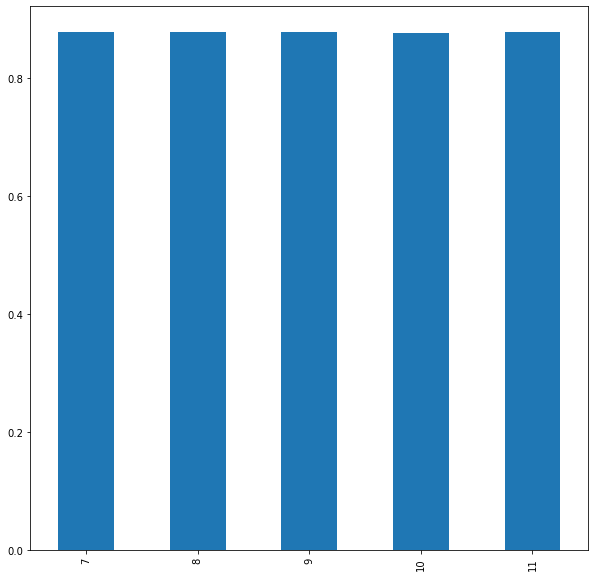

In [132]:
final_result["Accuracy"].tail().plot(kind = "bar", figsize = (10,10))